In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
df = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

In [3]:
#select relevant columns for analysis
df = df[['call_date', 'listener', 'duration_listened_minutes']]

In [4]:
#remove NULL (NaN) values from the listener column
df = df.dropna(subset = ['listener'])

In [5]:
#rename listener column by capitalizing the L
df.rename(columns = {'duration_listened_minutes':'Call Duration (mins)'}, inplace = True)

In [6]:
#drop listener column because it is no longer needed
df.drop('listener', inplace = True, axis = 1)

In [7]:
#convert call_date data type from object to datetime
df['call_date'] = pd.to_datetime(df.call_date)

In [8]:
#extract month from call_date column 
df['Months'] = df['call_date'].dt.month_name()

In [9]:
#remove call_date column because it is no longer needed anymore
df.drop('call_date', inplace = True, axis=1)

In [10]:
#calculate average call duration for each month
data_1 = df.groupby('Months').mean().reset_index()

In [11]:
#clean column name
data_1.rename(columns = {'Call Duration (mins)': 'Call Duration (avg mins)'}, inplace = True)

In [12]:
#calculate total call duration for each month
data_2 = df.groupby('Months').count().reset_index()

In [13]:
#clean up column name
data_2.rename(columns = {'Call Duration (mins)': 'Call Duration (total mins)'}, inplace = True)

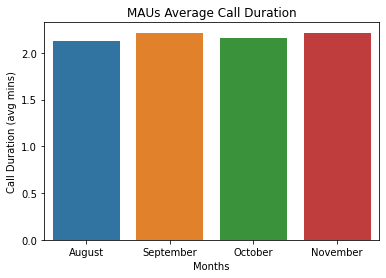

In [14]:
#plot monthly average call duration
order = ["August", "September", "October", "November"]
sns.barplot(data = data_1, x = data_1['Months'], y = data_1['Call Duration (avg mins)'], order = order).set(title = "MAUs Average Call Duration")
plt.savefig('MAUs_Average_Call_Duration.jpeg', bbox_inches='tight')

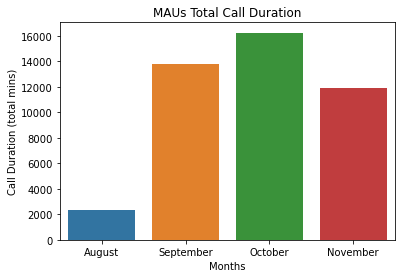

In [15]:
#plot total call duration
order = ["August", "September", "October", "November"]
sns.barplot(data = data_1, x = data_2['Months'], y = data_2['Call Duration (total mins)'], order = order).set(title = "MAUs Total Call Duration")
plt.savefig('MAUs_Total_Call_Duration.jpeg', bbox_inches='tight')

**Note**: for when connecting to full database, change `order` to include all 12 months